In [1]:
import json
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt

FILENAME_K = '../outputs/eval/vary_k.json'
FILENAME_N = '../outputs/eval/vary_n.json'

with open(FILENAME_K, 'r', encoding='utf-8') as f:
    data_k = json.load(f)

with open(FILENAME_N, 'r', encoding='utf-8') as f:
    data_n = json.load(f)

In [2]:
def get_data_points(data, x_axis, alg, metric):
    data = sorted(data, key=lambda d: d[x_axis])

    x_values, y_values = [], []
    for d in data:
        x = d[x_axis]
        for y in d[alg][metric]:
            x_values.append(x)
            y_values.append(y)

    y_mean_values = [mean(d[alg][metric]) for d in data]

    return x_values, y_values, y_mean_values

In [3]:
def plot_points_and_mean(fig, ax, x_values, y_values, y_means, even_space, color, alg):
    x_labels = sorted(list(set(x_values)))
    x_ticks = x_labels
    if even_space:
        x_ticks = list(range(len(x_labels)))
        x_values = [x_ticks[x_labels.index(x)] for x in x_values]

    sns.scatterplot(ax=ax, x=x_values, y=y_values, color=color, label=alg)
    ax.plot(x_ticks, y_means, marker='o', linestyle='-', color=color, label= alg + ' mean')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.legend()

## 1. Average RF for varying k, n

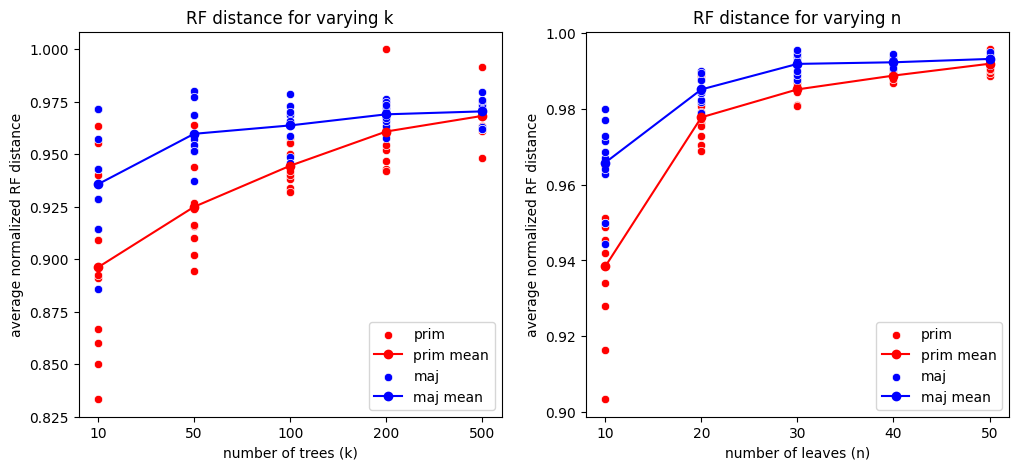

In [4]:
p_x_k, p_y_k, p_y_mean_k = get_data_points(data_k, 'k', 'prim', 'rf')
m_x_k, m_y_k, m_y_mean_k = get_data_points(data_k, 'k', 'maj', 'rf')

p_x_n, p_y_n, p_y_mean_n = get_data_points(data_n, 'n', 'prim', 'rf')
m_x_n, m_y_n, m_y_mean_n = get_data_points(data_n, 'n', 'maj', 'rf')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_points_and_mean(fig, ax1, p_x_k, p_y_k, p_y_mean_k, True, 'red', 'prim')
plot_points_and_mean(fig, ax1, m_x_k, m_y_k, m_y_mean_k, True, 'blue', 'maj')
ax1.set_xlabel('number of trees (k)')
ax1.set_ylabel('average normalized RF distance')
ax1.set_title('RF distance for varying k (n=10)')


plot_points_and_mean(fig, ax2, p_x_n, p_y_n, p_y_mean_n, True, 'red', 'prim')
plot_points_and_mean(fig, ax2, m_x_n, m_y_n, m_y_mean_n, True, 'blue', 'maj')
ax2.set_xlabel('number of leaves (n)')
ax2.set_ylabel('average normalized RF distance')
ax2.set_title('RF distance for varying n (k=100)')

plt.show()

## 2. Execution time for varying k, n

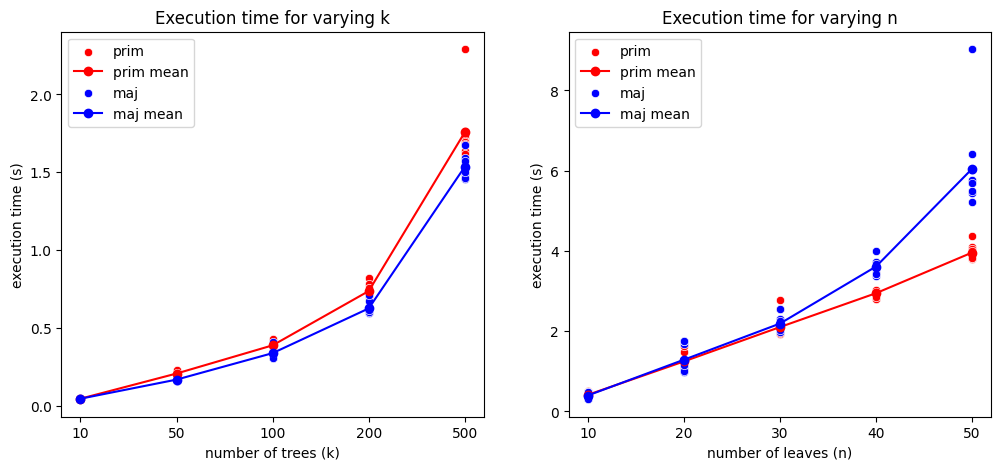

In [5]:
p_x_k, p_y_k, p_y_mean_k = get_data_points(data_k, 'k', 'prim', 'durations')
m_x_k, m_y_k, m_y_mean_k = get_data_points(data_k, 'k', 'maj', 'durations')

p_x_n, p_y_n, p_y_mean_n = get_data_points(data_n, 'n', 'prim', 'durations')
m_x_n, m_y_n, m_y_mean_n = get_data_points(data_n, 'n', 'maj', 'durations')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plot_points_and_mean(fig, ax1, p_x_k, p_y_k, p_y_mean_k, True, 'red', 'prim')
plot_points_and_mean(fig, ax1, m_x_k, m_y_k, m_y_mean_k, True, 'blue', 'maj')
ax1.set_xlabel('number of trees (k)')
ax1.set_ylabel('execution time (s)')
ax1.set_title('Execution time for varying k (n=10)')

plot_points_and_mean(fig, ax2, p_x_n, p_y_n, p_y_mean_n, True, 'red', 'prim')
plot_points_and_mean(fig, ax2, m_x_n, m_y_n, m_y_mean_n, True, 'blue', 'maj')
ax2.set_xlabel('number of leaves (n)')
ax2.set_ylabel('execution time (s)')
ax2.set_title('Execution time for varying n (k=100)')

plt.show()